In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

# Args

In [4]:
EXP = 'exp3/'
PRJ = 'gem_reduction_throughout_pipeline/'

# Plotting dir

In [85]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" + EXP
FIG_SUND = "/Volumes/sund/Public/T-cells-and-cancer/herpov/plots/" + EXP + PRJ

# Input data

In [71]:
gems_raw_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/gem_lists/gems_raw.lst"
gems_ann_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/gem_lists/gems_annotated.lst"
gems_crd_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/gem_lists/gems_annotated_credible.lst"
gems_m10_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/gem_lists/gems_annotated_credible_min10.lst"

In [19]:
blast_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/blast/expected_templates/blast.annotated.clean.tsv"
tcr_gem_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_TCR/processed/gem_filtration_lists/ready_for_use.lst"
tcr_contig_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv"


cred_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/tables/exp3/tcr_barcode_annotations.csv"

# Output data

# Import input

## List files

In [72]:
gems_raw = np.loadtxt(gems_raw_fil, dtype=str)

In [20]:
gems_ann = np.loadtxt(gems_ann_fil, dtype=str)

In [21]:
gems_crd = np.loadtxt(gems_crd_fil, dtype=str)

In [25]:
gems_m10 = np.loadtxt(gems_m10_fil, dtype=str)

## Full files

In [9]:
blast_df = pd.read_csv(blast_annotations, sep="\t")

In [20]:
cred_df = pd.read_csv(cred_annotations)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,8,9,10,13,14,15,17,19,20,23,24,25,29,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
tcr_df = pd.read_csv(tcr_contig_annotations)
tcr_df.rename(columns={'barcode': 'gem', 'raw_clonotype_id': 'clonotype'}, inplace=True)

In [82]:
tcr_gems = np.loadtxt(tcr_gem_file, dtype=np.str)

# Main

## Barcodes

In [22]:
blast_df.head()

,query_id,template_id,alignment_length,bit_score,gem,tso,b_primer,anneal,a_primer,match,credible_alignment,barcode,sample
0,HBBAF:02076:00992,A4000B302_bc25mer_51469,30,56.5,TTTGTCATCTTTAGTC-1,NaN,NaN,NaN,PRIMER_CD8,1,False,A4000B302,bc25mer_51469
1,HBBAF:01484:01130,A4000B302_bc25mer_51469,30,56.5,TTTGTCATCTTCGGTC-1,TSO,NaN,NaN,PRIMER_CD8,2,False,A4000B302,bc25mer_51469
2,HBBAF:03655:01601,A4000B302_bc25mer_51469,30,56.5,TTTGTCATCTGCGGCA-1,TSO,NaN,NaN,PRIMER_CD8,2,False,A4000B302,bc25mer_51469
3,HBBAF:03645:01549,A1071B302_bc25mer_21627,26,49.1,TTTGTCATCTGCGGCA-1,TSO,NaN,NaN,PRIMER_MHC,2,False,A1071B302,bc25mer_21627
4,HBBAF:03176:03198,A4000B302_bc25mer_51469,29,54.7,TTTGTCATCTGCGGCA-1,TSO,NaN,NaN,PRIMER_CD8,2,False,A4000B302,bc25mer_51469


In [27]:
cd8_gems_ann = blast_df[blast_df.barcode.str.startswith("A4000", na = False)].gem.values
mhc_gems_ann = blast_df[~blast_df.barcode.str.startswith("A4000", na = False)].gem.values

In [51]:
cd8_gems_crd = blast_df[(blast_df.credible_alignment == True) & (blast_df.barcode.str.startswith("A4000", na = False))].gem.values
mhc_gems_crd = blast_df[(blast_df.credible_alignment == True) & (~blast_df.barcode.str.startswith("A4000", na = False))].gem.values

### Read counts

In [57]:
cd8_df = blast_df[(blast_df.credible_alignment == True) & (blast_df.template_id.str.contains("A4000", na = False))]
mhc_df = blast_df[(blast_df.credible_alignment == True) & (~blast_df.template_id.str.contains("A4000", na = False))]

In [58]:
cd8_unique_df = cd8_df.groupby(['gem'])['template_id'].apply(pd.Series.mode).to_frame().reset_index()
mhc_unique_df = mhc_df.groupby(['gem'])['template_id'].apply(pd.Series.mode).to_frame().reset_index()

In [59]:
cd8_read_counts_df = cd8_df.groupby(['gem', 'template_id'])['query_id'].count().to_frame().reset_index()
mhc_read_counts_df = mhc_df.groupby(['gem', 'template_id'])['query_id'].count().to_frame().reset_index()
cd8_read_counts_df.rename(columns={'query_id': 'read_counts'}, inplace=True)
mhc_read_counts_df.rename(columns={'query_id': 'read_counts'}, inplace=True)

In [60]:
cd8_mode_df = pd.merge(cd8_unique_df[['gem', 'template_id']], cd8_df, on=['gem','template_id'], how='left').merge(cd8_read_counts_df,
                                                                                                                  how='left', on=['gem','template_id'])
mhc_mode_df = pd.merge(mhc_unique_df[['gem', 'template_id']], mhc_df, on=['gem','template_id'], how='left').merge(mhc_read_counts_df,
                                                                                                                  how='left', on=['gem','template_id'])

In [67]:
cd8_gems_m10 = cd8_mode_df[(cd8_mode_df.read_counts >= 10)].gem.values
mhc_gems_m10 = mhc_mode_df[(mhc_mode_df.read_counts >= 10)].gem.values

In [92]:
s_cd8_raw = set(gems_raw)
s_mhc_raw = set(gems_raw)
s_cd8_ann = set(cd8_gems_ann)
s_mhc_ann = set(mhc_gems_ann)
s_cd8_crd = set(cd8_gems_crd)
s_mhc_crd = set(mhc_gems_crd)
s_cd8_m10 = set(cd8_gems_m10)
s_mhc_m10 = set(mhc_gems_m10)

In [68]:
print(len(set(cd8_gems_ann)))
print(len(set(mhc_gems_ann)))
print(len(set(cd8_gems_crd)))
print(len(set(mhc_gems_crd)))
print(len(set(cd8_gems_m10)))
print(len(set(mhc_gems_m10)))

37851
14576
2831
5687
266
3324


## MHC barcode GEMs

In [73]:
# Number of unique GEMs in raw reads
n_gems_raw = len(set(gems_raw))
#n_gems_ann = len(set(gems_ann))
#n_gems_crd = len(set(gems_crd))
#n_gems_m10 = len(set(gems_m10))


n_gems_ann = len(set(mhc_gems_ann))
n_gems_crd = len(set(mhc_gems_crd))
n_gems_m10 = len(set(mhc_gems_m10))

In [74]:
print(n_gems_raw)
print(n_gems_ann)
print(n_gems_crd)
print(n_gems_m10)

108512
14576
5687
3324


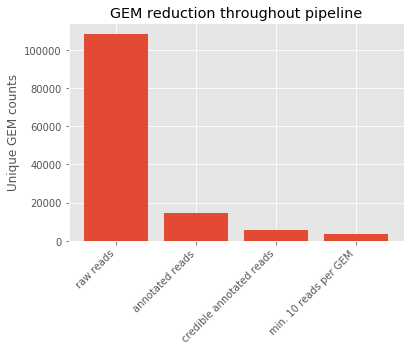

In [86]:
version = 1

x = ['raw reads', 'annotated reads', 'credible annotated reads', 'min. 10 reads per GEM']
y = [n_gems_raw, n_gems_ann, n_gems_crd, n_gems_m10]
plt.bar(x, y)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Unique GEM counts")
plt.title("GEM reduction throughout pipeline")
plt.savefig(FIG_DIR + "v%i.pdf" %(version), bbox_inches='tight')
plt.show()

In [87]:
np.savetxt(FIG_DIR + "counts.txt", y, fmt='%i')

# Raw reads, 108512
Count derived from processed/longranger_clean. Thus the longranger annotation of GEMs
# Annotated reads, 41463
Count derived from the reads that could in any way be annotated by BLAST
# Credible reads, 973
Count derived from the reads that could be annotated unambiguously and therefore were credible
# Min 10, 774
Contains only GEMs that were sequenced with 10 or more barcode reads

## TCR

In [89]:
s_tcr_raw = set(tcr_df.gem.values)

In [90]:
s_tcr_ann = set(tcr_df[tcr_df.gem.isin(tcr_gems)].gem.values)


In [84]:
len(set(tcr_df[tcr_df.gem.isin(tcr_gems) & (tcr_df.productive == 'True') & (tcr_df.high_confidence == True)].gem.values))



5993

# Venn

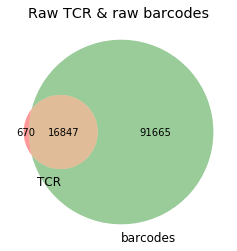

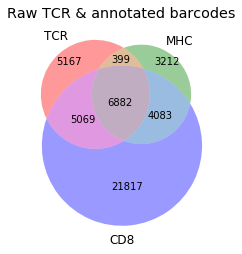

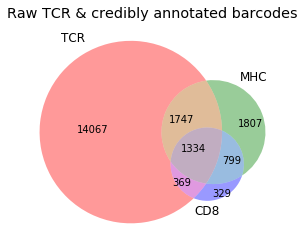

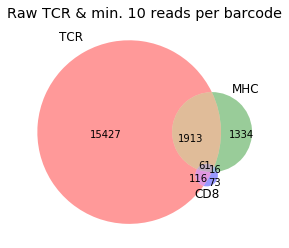

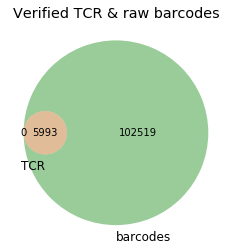

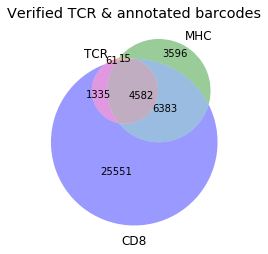

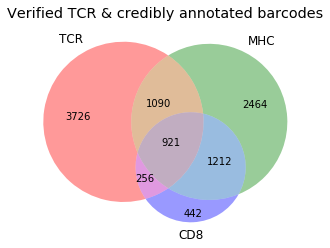

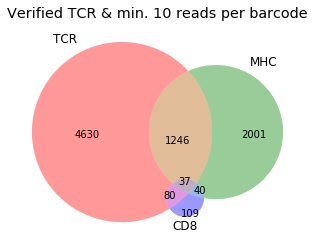

In [97]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2

for a, a_tit in [(s_tcr_raw, "Raw TCR"), (s_tcr_ann, "Verified TCR")]:
    for c,b,tit in [(s_cd8_raw, s_mhc_raw, "raw barcodes"), (s_cd8_ann, s_mhc_ann, "annotated barcodes"), (s_cd8_crd, s_mhc_crd, "credibly annotated barcodes"), (s_cd8_m10, s_mhc_m10, "min. 10 reads per barcode")]:
        
        if tit == "raw barcodes":
            ab = len(a.intersection(b))
            a_b = len(a) - ab
            b_a = len(b) - ab

            title = "Venn of MHC annotations"
            venn2(subsets = (a_b, b_a, ab), set_labels = ('TCR', 'barcodes'))
            title = a_tit + " & " + tit
            plt.title(title)
            plt.savefig(FIG_DIR + "v%i.%s.pdf" %(version, a_tit + "_" + tit), bbox_inches='tight')
            plt.show()
            
        else:
            ab = a.intersection(b)
            ac = a.intersection(c)
            bc = b.intersection(c)

            abc = len(ab.intersection(c))
            ab_c = len(ab) - abc
            ac_b = len(ac) - abc
            bc_a = len(bc) - abc
            a_bc = len(a) - ab_c - ac_b - abc
            b_ac = len(b) - ab_c - bc_a - abc
            c_ab = len(c) - ac_b - bc_a - abc

            venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('TCR', 'MHC', 'CD8'))
            title = a_tit + " & " + tit
            plt.title(title)
            plt.savefig(FIG_DIR + "v%i.%s.pdf" %(version, a_tit + "_" + tit), bbox_inches='tight')
            plt.show()